In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.colors

import pandas as pd

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

#Pandas Introduction

In [92]:
!wget https://raw.githubusercontent.com/likhitha9reddy/PadhAI/master/mobile_cleaned.csv

--2020-04-29 15:46:41--  https://raw.githubusercontent.com/likhitha9reddy/PadhAI/master/mobile_cleaned.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14044 (14K) [text/plain]
Saving to: ‘mobile_cleaned.csv.2’

mobile_cleaned.csv. 100%[===================>]  13.71K  --.-KB/s    in 0.007s  

2020-04-29 15:46:41 (1.96 MB/s) - ‘mobile_cleaned.csv.2’ saved [14044/14044]



In [93]:
!ls

mobile_cleaned.csv  mobile_cleaned.csv.1  mobile_cleaned.csv.2	sample_data


In [0]:
df = pd.read_csv('mobile_cleaned.csv')

In [95]:
df.head()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,screen_size,frames_per_second,FM,no_of_reviews_in_gsmarena_in_week,os,phone_height,screen_protection,sim_size,price,talk_time,video_resolution,display_resolution,removable_battery,display_type,primary_camera_resolution,battery_type,ram_memory,internal_memory,brand_rank,no_of_cores,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
0,0,12,55,155.0,250,1.3,10.5,5,2.00,0,4.5,15,3,0,0,132.9,26,3,3870,9,480,12,3,11,5.00,1,1,7,29,6,4,2,3,67.8,64.0,5,3,2000,125,1
1,0,1,55,132.0,300,1.3,10.6,5,0.30,1,4.0,30,2,6,0,124.5,26,5,4059,9,720,15,3,11,5.00,1,1,7,11,6,4,4,6,64.0,32.0,5,3,2000,165,1
2,0,9,55,142.0,329,1.5,8.5,5,2.00,3,5.0,30,2,20,0,145.5,4,3,4777,10,1080,4,3,1,5.04,2,1,7,27,6,4,9,6,72.0,32.0,6,3,2500,164,0
3,0,8,55,152.0,385,1.3,8.0,5,2.00,3,5.0,15,3,0,0,147.5,26,3,5799,19,720,17,3,2,5.00,1,1,7,4,6,4,1,3,75.1,32.0,6,3,3000,165,1
4,1,1,55,234.0,385,1.3,7.9,5,1.92,3,5.0,15,3,0,0,179.0,18,3,5990,11,720,17,3,1,5.00,1,1,7,4,6,4,1,6,91.0,32.0,6,3,3000,165,0


In [96]:
df.tail()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,screen_size,frames_per_second,FM,no_of_reviews_in_gsmarena_in_week,os,phone_height,screen_protection,sim_size,price,talk_time,video_resolution,display_resolution,removable_battery,display_type,primary_camera_resolution,battery_type,ram_memory,internal_memory,brand_rank,no_of_cores,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
104,3,10,14,192.0,540,1.8,9.4,2,2.0,2,5.4,30,1,0,0,147.0,26,7,54900,15,2160,10,4,0,18.0,4,3,4,25,3,4,29,6,77.2,256.0,6,3,3410,8,1
105,0,5,3,157.0,400,2.3,7.7,5,5.0,3,5.5,30,4,144,0,150.9,7,9,56900,27,2160,10,1,8,12.0,1,4,4,2,6,6,27,1,72.6,200.0,9,3,3600,101,1
106,3,10,6,192.0,384,1.8,7.3,2,5.0,3,5.5,30,4,81,2,158.2,16,11,59000,24,2160,7,1,2,12.0,2,2,2,1,0,1,16,6,77.9,0.0,14,13,2750,1,1
107,3,10,12,129.0,250,1.4,6.9,2,1.2,3,4.7,60,4,39,2,138.1,16,11,64500,14,1080,7,1,2,8.0,2,1,1,1,0,1,13,6,67.0,0.0,12,13,1810,7,1
108,2,8,3,158.0,400,2.2,7.4,6,8.0,3,5.5,30,1,0,0,152.7,7,8,27999,40,2160,9,1,6,16.0,4,6,6,12,6,5,16,6,74.7,0.0,10,12,3000,2,0


In [97]:
type(df)

pandas.core.frame.DataFrame

In [98]:
dir(df)

['FM',
 'T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__r

In [99]:
len(df)

109

In [100]:
df.shape

(109, 40)

In [101]:
df.loc[7]

sim_type                                0.0
aperture                                8.0
gpu_rank                               41.0
weight                                154.0
stand_by_time                         182.0
processor_frequency                     1.0
thickness                               8.1
flash_type                              5.0
front_camera_resolution                 2.0
auto_focus                              3.0
screen_size                             5.0
frames_per_second                      30.0
FM                                      5.0
no_of_reviews_in_gsmarena_in_week       0.0
os                                      0.0
phone_height                          132.0
screen_protection                      26.0
sim_size                                3.0
price                                6599.0
talk_time                               7.0
video_resolution                      720.0
display_resolution                      4.0
removable_battery               

In [0]:
df_short = df[23:29]

In [103]:
df_short.shape

(6, 40)

In [104]:
df_short.head()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,screen_size,frames_per_second,FM,no_of_reviews_in_gsmarena_in_week,os,phone_height,screen_protection,sim_size,price,talk_time,video_resolution,display_resolution,removable_battery,display_type,primary_camera_resolution,battery_type,ram_memory,internal_memory,brand_rank,no_of_cores,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
23,3,1,43,97.0,345,1.2,5.1,5,5.0,3,4.8,30,3,0,0,141.9,5,9,8490,8,1080,14,1,0,8.0,2,2,2,4,6,2,10,2,68.1,0.0,5,3,2000,94,1
24,0,10,29,150.0,322,1.5,8.2,5,5.0,3,5.0,30,3,113,0,142.0,2,12,8499,15,1080,9,3,2,13.0,2,2,2,11,4,6,23,6,71.0,32.0,6,4,2750,21,1
25,0,8,43,202.0,914,1.2,10.6,2,5.0,3,5.5,30,4,34,0,156.0,18,3,8999,38,1080,4,1,2,13.0,2,2,2,16,6,6,7,6,77.5,64.0,5,4,5000,94,1
26,0,8,43,170.0,456,1.2,10.8,2,5.0,3,5.5,30,2,189,0,152.5,7,3,8999,21,1080,9,3,2,13.0,2,2,2,16,6,4,7,6,77.2,128.0,5,3,3000,94,1
27,0,8,38,155.0,350,1.3,9.3,5,5.0,3,5.5,30,3,122,0,151.0,18,3,8999,38,1080,4,1,2,13.0,1,2,2,18,4,6,7,6,77.0,64.0,6,4,3000,19,1


In [0]:
df_thin = df[['stand_by_time', 'expandable_memory', 'price', 'battery_capacity', 'is_liked']]

In [106]:
df_thin.shape

(109, 5)

In [107]:
df_thin.head()

,stand_by_time,expandable_memory,price,battery_capacity,is_liked
0,250,64.0,3870,2000,1
1,300,32.0,4059,2000,1
2,329,32.0,4777,2500,0
3,385,32.0,5799,3000,1
4,385,32.0,5990,3000,0


In [0]:
df_liked = df_thin[df_thin['is_liked'] == 1]

In [109]:
df_liked.shape

(92, 5)

In [110]:
df_thin['price'].describe()

count      109.000000
mean     19373.211009
std      14039.197220
min       3870.000000
25%       8999.000000
50%      14614.000000
75%      24999.000000
max      64500.000000
Name: price, dtype: float64

In [111]:
df_thin.describe()

,stand_by_time,expandable_memory,price,battery_capacity,is_liked
count,109.00000,109.000000,109.000000,109.000000,109.000000
mean,404.66055,104.513761,19373.211009,2841.779817,0.844037
std,176.44206,275.799767,14039.197220,655.003963,0.364496
min,160.00000,0.000000,3870.000000,1560.000000,0.000000
25%,264.00000,0.000000,8999.000000,2470.000000,1.000000
50%,360.00000,32.000000,14614.000000,2900.000000,1.000000
75%,500.00000,128.000000,24999.000000,3100.000000,1.000000
max,1093.00000,2048.000000,64500.000000,5000.000000,1.000000


In [112]:
df_thin[df_thin['is_liked'] == 1]['price'].mean()

19393.239130434784

In [113]:
df_thin[df_thin['is_liked'] == 0]['price'].mean()

19264.823529411766

In [114]:
grp_by = df_thin.groupby(['is_liked'])
grp_by.describe()

stand_by_time                          ... battery_capacity                
                 count        mean         std  ...              50%     75%     max
is_liked                                        ...                                 
0                 17.0  457.235294  157.094927  ...           2900.0  3000.0  4100.0
1                 92.0  394.945652  178.876246  ...           2900.0  3100.0  5000.0

[2 rows x 32 columns]

#Plotting Sigmoid Function

$S_{w, b}(x) = \frac{1}{1 + e^{-(wx + b)}}$

In [0]:
def sigmoid(x, w, b):
  return 1/(1 + np.exp(-(w*x + b)))

In [116]:
sigmoid(-10, 0.5, 0)

0.0066928509242848554

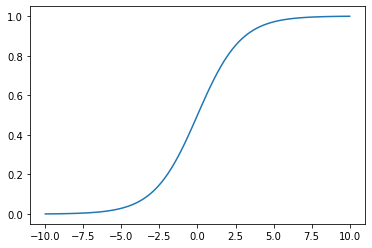

In [117]:
w = 0.7    #@param {type: "slider", min: -2, max: 2, step: 0.1}
b = 0  #@param {type: "slider", min: -2, max: 2, step: 0.1}
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)

plt.plot(X, Y)
plt.show()


$S_{w_1, w_2, b}(x_1, x_2) = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 + b)}}$

In [0]:
def sigmoid_2d(x1, x2, w1, w2, b):
  return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [119]:
sigmoid_2d(1, 20, 0.5, 0, 0)

0.6224593312018546

In [120]:
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

XX1, XX2 = np.meshgrid(X1, X2)

print(X1.shape, X2.shape, XX1.shape, XX2.shape)

(100,) (100,) (100, 100) (100, 100)


In [0]:
w1 = 2
w2 = -0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)


In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

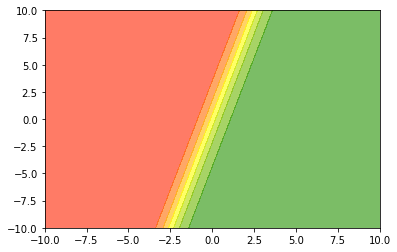

In [123]:
plt.contourf(XX1, XX2, Y, cmap = my_cmap, alpha = 0.6)
plt.show()

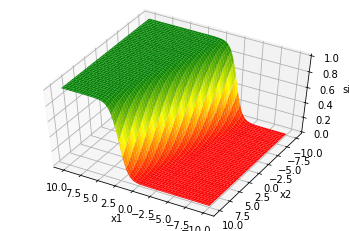

In [124]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap=my_cmap)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('sig')

ax.view_init(50, 120)


# Compute Loss for a Given Dataset

In [0]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

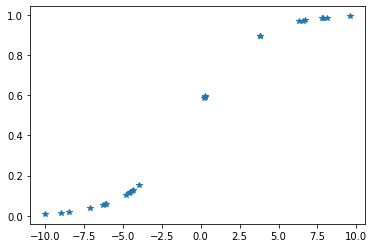

In [126]:
plt.plot(X, Y, '*')
plt.show()

In [0]:
def calculate_loss(X, Y, w_est, b_est):
  loss = 0
  for x, y in zip(X, Y):
    loss += (y - sigmoid(x, w_est, b_est))**2
  return loss

In [0]:
W = np.linspace(0, 2, 101)
B = np.linspace(-1, 1, 101)

WW, BB = np.meshgrid(W, B)

Loss = np.zeros(WW.shape)

In [129]:
WW.shape

(101, 101)

In [0]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

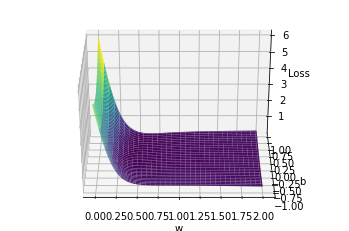

In [131]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

ax.view_init(30, 270)

In [0]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * Loss.shape[1])

In [133]:
print(i, j)

62 25


In [134]:
print(WW[i, j], BB[i, j])

0.5 0.24


# Class for Sigmoid Neuron

In [0]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b #x1w1 + x2w2 + ... xnwn + b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
      
    if display_loss:
      loss = {}
    
    for i in range(epochs) : #tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)       
      self.w -= learning_rate * dw #self.w = self.w - learning_rate * dw
      self.b -= learning_rate * db
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        loss[i] = mean_squared_error(Y_pred, Y)
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

# Fit for toy data

In [0]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]

In [0]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.25, True)

In [0]:
def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1, XX2, YY, cmap=my_cmap, alpha=0.6)
  ax.scatter(X[:,0], X[:,1],c=Y, cmap=my_cmap)
  ax.plot()

[[0.18815833 0.02321843]] [-0.00108647]
[[ 0.64843852 -0.3650015 ]] [-0.02134641]
[[ 0.87347748 -0.13541574]] [-0.06774978]
[[ 0.88953545 -0.4391638 ]] [-0.12786862]
[[ 1.06087649 -0.22894041]] [-0.17159224]
[[ 1.06762578 -0.44914519]] [-0.22586857]
[[ 1.18241633 -0.32438909]] [-0.2638571]
[[ 1.20407728 -0.43721706]] [-0.30591173]
[[ 1.27204969 -0.39803967]] [-0.33823243]
[[ 1.30666262 -0.43864878]] [-0.37066249]
[[ 1.35082844 -0.44086506]] [-0.39904788]
[[ 1.38691821 -0.4565373 ]] [-0.42593696]
[[ 1.42206265 -0.46684031]] [-0.45078001]
[[ 1.45455759 -0.47756837]] [-0.47403746]
[[ 1.48515112 -0.48743216]] [-0.4958243]
[[ 1.5139701 -0.4967568]] [-0.51630433]
[[ 1.54121106 -0.50556782]] [-0.53560731]
[[ 1.56703039 -0.51391922]] [-0.55384738]
[[ 1.59156366 -0.52185481]] [-0.57112387]
[[ 1.61492831 -0.52941263]] [-0.5875237]
[[ 1.63722671 -0.53662585]] [-0.60312329]
[[ 1.65854863 -0.54352355]] [-0.61799005]
[[ 1.67897319 -0.55013135]] [-0.63218371]
[[ 1.69857045 -0.55647193]] [-0.64575735]

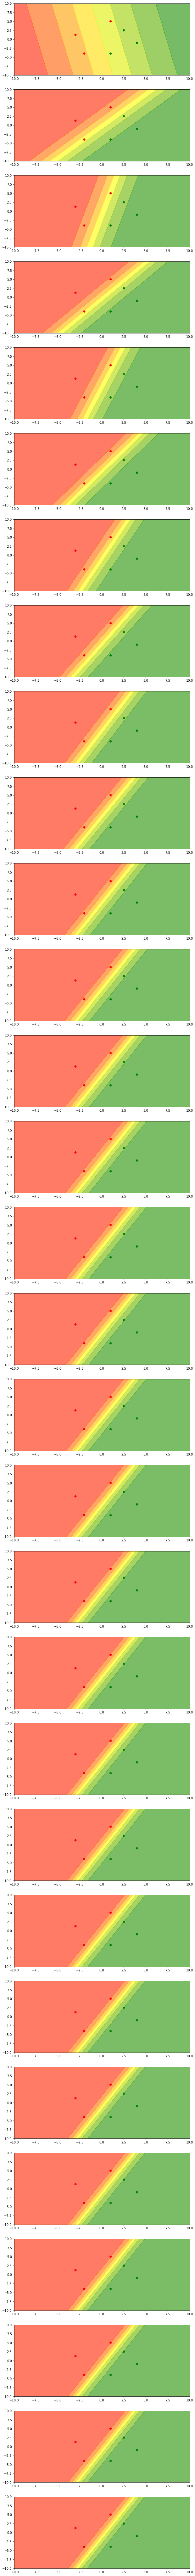

In [184]:
sn.fit(X, Y, 1, 0.05, True)
N = 30
plt.figure(figsize=(10, N*5))
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1, i + 1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.5, False)

# Load Data

In [185]:
!wget https://raw.githubusercontent.com/likhitha9reddy/PadhAI/master/mobile_cleaned.csv

--2020-04-29 16:18:34--  https://raw.githubusercontent.com/likhitha9reddy/PadhAI/master/mobile_cleaned.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14044 (14K) [text/plain]
Saving to: ‘mobile_cleaned.csv.4’

mobile_cleaned.csv. 100%[===================>]  13.71K  --.-KB/s    in 0.007s  

2020-04-29 16:18:34 (1.90 MB/s) - ‘mobile_cleaned.csv.4’ saved [14044/14044]



In [186]:
!ls

mobile_cleaned.csv    mobile_cleaned.csv.2  mobile_cleaned.csv.4
mobile_cleaned.csv.1  mobile_cleaned.csv.3  sample_data


In [0]:
data = pd.read_csv('mobile_cleaned.csv')

In [188]:
data.head()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,screen_size,frames_per_second,FM,no_of_reviews_in_gsmarena_in_week,os,phone_height,screen_protection,sim_size,price,talk_time,video_resolution,display_resolution,removable_battery,display_type,primary_camera_resolution,battery_type,ram_memory,internal_memory,brand_rank,no_of_cores,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
0,0,12,55,155.0,250,1.3,10.5,5,2.00,0,4.5,15,3,0,0,132.9,26,3,3870,9,480,12,3,11,5.00,1,1,7,29,6,4,2,3,67.8,64.0,5,3,2000,125,1
1,0,1,55,132.0,300,1.3,10.6,5,0.30,1,4.0,30,2,6,0,124.5,26,5,4059,9,720,15,3,11,5.00,1,1,7,11,6,4,4,6,64.0,32.0,5,3,2000,165,1
2,0,9,55,142.0,329,1.5,8.5,5,2.00,3,5.0,30,2,20,0,145.5,4,3,4777,10,1080,4,3,1,5.04,2,1,7,27,6,4,9,6,72.0,32.0,6,3,2500,164,0
3,0,8,55,152.0,385,1.3,8.0,5,2.00,3,5.0,15,3,0,0,147.5,26,3,5799,19,720,17,3,2,5.00,1,1,7,4,6,4,1,3,75.1,32.0,6,3,3000,165,1
4,1,1,55,234.0,385,1.3,7.9,5,1.92,3,5.0,15,3,0,0,179.0,18,3,5990,11,720,17,3,1,5.00,1,1,7,4,6,4,1,6,91.0,32.0,6,3,3000,165,0


In [0]:
data.shape

In [0]:
X = data.drop('is_liked', axis=1)

In [0]:
Y = data['is_liked'].values

In [0]:
Y

In [0]:
threshold = 4.2
data['Class'] = (data['is_liked'] >= threshold).astype(np.int)

In [0]:
data['Class'].value_counts(normalize=True)

In [0]:
Y_binarised = data['Class'].values

## Standardisation

In [0]:
R = np.random.random([100, 1])

In [0]:
plt.plot(R)
plt.show()

In [153]:
np.mean(R)

0.5552238636767718

In [0]:
np.std(R)

In [0]:
scaler = StandardScaler()

In [0]:
scaler.fit(R)

In [0]:
scaler.mean_

In [0]:
RT = scaler.transform(R)

In [0]:
np.mean(RT)

In [0]:
np.std(RT)

In [0]:
plt.plot(RT)
plt.show()

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, stratify=Y_binarised)

In [0]:
print(X_train.shape, X_test.shape)

In [0]:
scaler = StandardScaler()

In [0]:
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [0]:
minmax_scaler = MinMaxScaler()

In [0]:
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1, 1))

In [0]:
np.min(Y_scaled_train)

In [0]:
Y_scaled_test = minmax_scaler.transform(Y_test.reshape(-1, 1))

In [0]:
scaled_threshold = list(minmax_scaler.transform(np.array([threshold]).reshape(1, -1)))[0][0]

In [0]:
scaled_threshold

In [0]:
Y_binarised_train = (Y_scaled_train > scaled_threshold).astype("int").ravel()

In [0]:
Y_binarised_test = (Y_scaled_test > scaled_threshold).astype("int").ravel()

# Train on Real Data

In [0]:
sn = SigmoidNeuron()

In [0]:
sn.fit(X_scaled_train, Y_scaled_train, epochs=2000, learning_rate=0.015, display_loss=False)

In [0]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

In [0]:
Y_pred_binarised_train = (Y_pred_train > scaled_threshold).astype("int").ravel()
Y_pred_binarised_test = (Y_pred_test > scaled_threshold).astype("int").ravel()

In [0]:
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_binarised_train)
accuracy_test  = accuracy_score(Y_pred_binarised_test, Y_binarised_test)

In [196]:
print(accuracy_train, accuracy_test)

1.0 1.0
